# OZNAL - Predspracovanie a výber atribútov
Miroslav Čulík, Andrej Gáfrik

1. **Opis problému, dát**
2. **Stručný opis prác iných autorov** - pochopenie prác iných autorov, ktorí riešia rovnaký problém je veľmi dôležitou súčasťou skúmania. Môžete sa z iných prác inšpirovať a poučiť. Práce citujte v texte a uveďte v zozname použitej literatúry.
3. **Predspracovanie a výber atribútov** - opis použitých metód a ich výsledky (aj slepé uličky)
4. **DM metódy** - opis použitých metód, alebo predpokladaný scenár použitia (je potrebné poznať DM metódy, ktoré plánujete použiť, aby ste vedeli, ako dáta predspracovať)
5. **Prvotné experimenty**
6. **Vyhodnocovanie** - čo budete vyhodnocovať, aké miery, grafy, kritériá použijete

TODOS:

- ~~**price** - transformácia pomocou boxcox transformácie a nahradenie outlierov 5-95 percentilom~~
- ~~**bedrooms** - manuálna úprava inštancie s hodnotou 33 na 3~~
- ~~**sqft_living** - transformácia pomocou boxcox transformácie a nahradenie outlierov 5-95 percentilom~~
- ~~**sqft_lot** - transformácia pomocou boxcox transformácie a nahradenie outlierov mediánom~~
- ~~**sqft_above** - transformácia pomocou boxcox transformácie a nahradenie outlierov 5-95 percentilom~~
- ~~**sqft_basement** - transformácia pomocou odmocniny a nahradenie outlierov priemerom alebo odstránenie stĺpca~~
- ~~**sqft_living15** - transformácia pomocou logaritmu a nahradenie outlierov 5-95 percentilom~~
- ~~**sqft_lot15** - transformácia pomocou boxcox transformácie a nahradenie outlierov mediánom~~
- ~~chceme nejake atributy zmazať? ak ano, tak ake~~
- ~~Okrem zistení sme objavili 10 inštancií, ktoré majú hodnotu 0.0 pri počte kúpeľňového vybavenia v stĺpci `bathroom`, pričom až 7 z nich mám hodnotu počtu spální v atribúte `bedrooms` rovnú 0, zvyšné 3 majú hodnotu 1. Navrhujeme teda týchto 10 inštancií zmazať.~~

- ~~RMSLE nova metrika~~
- Outlieri - Popísať ako vznikli? Chybou, reálna hodnota
- ~~kodovanie kategorickych atributov (zipcode)- binary encoding, ...~~

- MSE, RMSE, RMSLE - podozrivo nízke hodnoty, ~~inverzná transformácia pred počítaním metrík - je treba si zapamätať hodnotu pri boxcox ceny a nájsť inverznú funkciu~~
- rozsirit evaluate aj na polynomialnu regresiu
- ~~feature engineering - priemerná cena za sqft v rámci štvrti - nahradenie hodnoty zipcodu priemernou cenou za sqft v rámci štvrti - SELECT avg(price/sqft_lot) GROUPBY zipcode a replace namiesto zipcode - toto robiť iba pre TRAIN, v teste len doplňame, ak príde nejaká nová hodnota v teste, tak tu musíme replacnuť priemernou cenou na 1 sqft v ramci celeho datasetu~~
- ~~feature engineering - urobit celkovu rozlohu (living+lot možno kombinacia s floors), pripadne vymysliet dalsie~~
- ~~feature selection - Filter, wrapper, embedded - https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b~~
- ~~filter - urobiť aj zistenie vzajomnej korelacie medzi jednotlivymi vybranymi atributmi a odstranit tie, ktore vzajomne koreluju~~


- ~~ake metriky chceme - pridat dalsie~~
- komentare k notebooku
- opisat DM metody co sme pouzili
- clanok v LateXu (~~+fixnutie sablony~~)


## Otázky:

- je nutné, aby sme robili cross-validation?
- je potrebné opakovať exploratívnu analyzu na normalizovanych dátach? ak áno, tak aké časti (+treba aj čo do článku dať?)


## Opis problému, dát
Výber toho najdôležitejšieho z minulého reportu

## Stručný opis prác iných autorov

**Vedecké zdroje:**
1. [Housing Price Prediction Using Machine Learning Algorithms: The Case of Melbourne City, Australia](https://ieeexplore.ieee.org/document/8614000)
    - House Sales in Melbourne City dataset (34k riadkov, 21 stlpcov)
    - Čistenie dát
        - stĺpce s viac ako 55% chýbajúcich hodnôt boli odstránené
        - záznamy s chýbajúcim údajom o cene boli taktiež vymazané
        - chýbajúce long a lat sú doplnené podľa adresy domu
        - outlieri boli vyriešené individuálne podľa stĺpca
        - rozlohy pozemkov menšie ako 10 metrov štvorcových boli odstránené
        - po čistení ostalo 20k riadkov a 11 stĺpcov
        - stĺpec cena bol transkormovaný logaritmom
        - vyčistené dáta sú rozdelené medzi trénovacie a validačné 
    - Redukcia dát 
        - použité techniky Stepwise a Boosting na získanie najsilnejších prediktorov
        - PCA na získanie signifikantných komponentov pre SVM
            - unsupervised prístup na redukciu dimenzionality, použitý na vylepšenie výsledkov SVM 
    - Modely: 
        - všetky obsahujú črty získané zo Stepwise
        - 10-fold CV, 
            - Lineárna regresia 
            - Polynomiálna regresia
            - Regression Trees
            - Neuronová sieť
            - SVM (taktiež používa PCA)
    - Metriky
        - MSE
        - všetky modely sú porovnané oproti lineárnej regresii (stĺpec evaluation ratio)
        - najlepšie výsledky pri SVM, avšak veľké rozdiely medzi train MSE a eval MSE naznačujú preučený model
![image](../images/results_australia.png)

2. [Research on the Sustainable Development of UrbanHousing Price Based on Transport Accessibility:A Case Study of Xi’an, China](https://www.mdpi.com/2071-1050/12/4/1497)

Autori v článku skúmajú vplyv prístupnosti verejnej dopravy na predikciu reálnych cien nehnuteľností.
Tento článok pracuje s dátami obsahujúcimi nehnuteľnosti a možnosti transportu(cestná sieť, autobusové linky a linky metra) v hlavnej mestskej časti čínskeho mesta Xi'an. Použitím tradičného hedonického cenového modelu (z angl. traditional hedonic price model) a algoritmom náhodného lesa (z angl. Random Forest) autori porovnávajú situácie s prítomným, resp. neprítomným atribútom znázorňujúcim prístupnosť verejnej dopravy(prístupnosť autobusovej verejnej dopravy a metra). Výsledkom tejto práce bolo zistenie, že schopnosť modelov predikovať reálnu cenu nehnuteľností po pridaní atribútu prístupnosti verejnej dopravy je štatisticky zlepšená oproti situácii, kedy atribút prístupnosti verejnej dopravy prítomný nie je.
    - modely: 
        - Random Forests(M3 - max_features=8, M4 - max_features=4)
    - metriky:
        - R^2
        - MSE
        
![image2](../images/results_china.png)

**Nevedecké zdroje:**
1. https://towardsdatascience.com/regression-using-sklearn-on-kc-housing-dataset-1ac80ca3d6d4
    - rovnaký dataset ako používame my
    - modely:
        - lineárna regresia
        - viacnásobná regresia
        - polynomiálna regresia
    - metriky: R^2 
    
| Model         | R^2           |
|:-------------:|:-------------:|
| Jednoduchá lineárna regresia (sqft_living)     | 0.496 |
| Jednoduchá lineárna regresia (grade)     | 0.46 |
| Viacnásobná lineárna regresia (features1)     | 0.555     |
| Viacnásobná lineárna regresia (features2)     | 0.672    |
| Polynomiálna regresia(features1) - stupeň 2 | 0.759 |
| Polynomiálna regresia(features1) - stupeň 3 | 0.664 |

2. [Real Estate Price Prediction Using Machine Learning - Data Analytics Research Project](http://trap.ncirl.ie/3096/1/aswinsivamravikumar.pdf)
    - modely:
        - Random Forest
        - Neurónová sieť
        - Gradient Boosting
        - Ensemble Learning Bagging
        - Support Vector Machine
        - Viacnásobná regresia
    - metriky: 
        - accuracy
        - RMSE
        
![image3](../images/results_non_scientific.png)

## Predspracovanie a výber atribútov

- **price** - transformácia pomocou boxcox transformácie a nahradenie outlierov 5-95 percentilom
- **bedrooms** - manuálna úprava inštancie s hodnotou 33 na 3
- **sqft_living** - transformácia pomocou logaritmu a nahradenie outlierov 5-95 percentilom
- **sqft_lot** - transformácia pomocou boxcox transformácie a nahradenie outlierov mediánom
- **sqft_above** - transformácia pomocou boxcox transformácie a nahradenie outlierov 5-95 percentilom
- **sqft_basement** - transformácia pomocou odmocniny a nahradenie outlierov priemerom alebo odstránenie stĺpca
- **sqft_living15** - transformácia pomocou logaritmu a nahradenie outlierov 5-95 percentilom
- **sqft_lot15** - transformácia pomocou boxcox transformácie a nahradenie outlierov mediánom

Okrem zistení sme objavili 10 inštancií, ktoré majú hodnotu 0.0 pri počte kúpeľňového vybavenia v stĺpci `bathroom`, pričom až 7 z nich mám hodnotu počtu spální v atribúte `bedrooms` rovnú 0, zvyšné 3 majú hodnotu 1. Navrhujeme teda týchto 10 inštancií zmazať.

In [1]:
cd ..

C:\Users\Mirec\Desktop\08_fiit_ls_2019_2020\OZNAL\projekt\oznal_project


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.special import inv_boxcox
from matplotlib import pyplot as plt
from sklearn import metrics

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm

from src import analysis, preprocessing2, feature_selection2, metrics2

pd.set_option('max_rows', None)
pd.set_option('max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
path_housing = "data\\kc_house_data.csv"
df = pd.read_csv(path_housing, sep=",")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,20141209T000000,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,20150225T000000,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,20141209T000000,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,20150218T000000,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503


In [4]:
X_train, X_valid, X_test, y_train, y_valid, y_test, price_lambda = preprocessing2.run_pipeline(df)

In [6]:
df_try1 = X_train.copy()
df_try1['price'] = y_train

df_try2 = X_valid.copy()
df_try2['price'] = y_valid

df_try3 = X_test.copy()
df_try3['price'] = y_test

df_try = pd.concat([df_try1, df_try2, df_try3])
# df_try = df_try.drop(columns=['zipcode_0'])
df_try.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21606 entries, 12496 to 16594
Data columns (total 28 columns):
id                21606 non-null int64
bedrooms          21606 non-null int64
bathrooms         21606 non-null float64
sqft_living       21606 non-null float64
sqft_lot          21606 non-null float64
floors            21606 non-null float64
waterfront        21606 non-null int64
view              21606 non-null int64
condition         21606 non-null int64
grade             21606 non-null int64
sqft_above        21606 non-null float64
sqft_basement     21606 non-null float64
yr_built          21606 non-null int64
yr_renovated      21606 non-null int64
zipcode_1         21606 non-null int64
zipcode_2         21606 non-null int64
zipcode_3         21606 non-null int64
zipcode_4         21606 non-null int64
zipcode_5         21606 non-null int64
zipcode_6         21606 non-null int64
zipcode_7         21606 non-null int64
lat               21606 non-null float64
long           

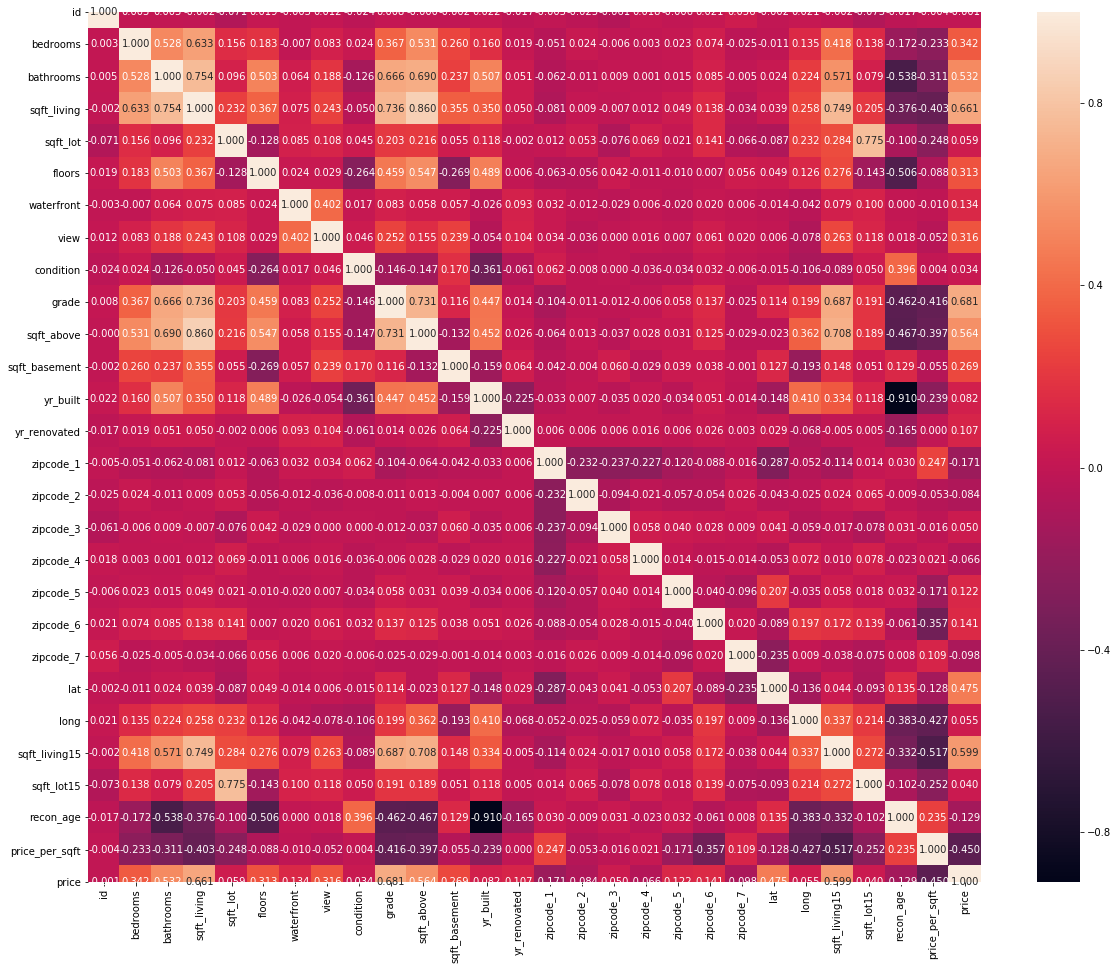

In [7]:
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(df_try.corr(), ax=ax, annot=True, fmt=".3f")
# df_try.corr()

In [8]:
df['sqft_living'].mean()

2079.8997362698374

In [9]:
df['sqft_living'].quantile(0.95)

3760.0

## DM metódy

1. Lineárna regresia
 - jednoduchá
 - viacnásobná
 
2. Polynomiálna regresia
 - stupeň 2
 - stupeň 3

3. Decission Tree Regression / Regression Tree
4. Support Vector Regression (SVR)
5. Random Forest

## Prvotné experimenty

In [120]:
from numpy.polynomial.polynomial import polyfit

def evaluate(model, x_train, y_train, x_test, y_test, pred, price_lambda): 
    y_test_inv = inv_boxcox(y_test, price_lambda)
    pred_inv = inv_boxcox(pred, price_lambda)               
        
    mean_squared_error=metrics.mean_squared_error(y_test_inv,pred_inv)
    rmlse = metrics.mean_squared_log_error(y_test_inv, pred_inv)

    r2_train = model.score(x_train,y_train)
    r2_test = model.score(x_test,y_test)
    adj_r2_train = 1 - (((1 - r2_train) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
    adj_r2_test = 1 - (((1 - r2_test) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))

    print('Mean Squared Error', round(mean_squared_error, 5))
    print('Root Mean Squared Error', round(np.sqrt(mean_squared_error),5))
    print('Root Mean Squared Log Error', round(np.sqrt(rmlse),5))
    print('R squared training',round(r2_train,3))
    print('R squared testing',round(r2_test,3))
    print('Adjusted-R squared training', round(adj_r2_train,3))
    print('Adjusted-R squared testing', round(adj_r2_test,3))
    print('intercept',model.intercept_)
    print('coefficient',model.coef_)
    
#     print(y_test_inv.reshape(1,-1)[0])
    fig, ax= plt.subplots(figsize=(10,16))
#     y_axis_data = np.sqrt((pred_inv.reshape(1,-1)-y_test_inv)**2)
    y_axis_data = pred_inv.reshape(1,-1)-y_test_inv
    plt.scatter(x=y_test_inv, y=y_axis_data[0])
    # Fit with polyfit
    print(y_test_inv.reshape(1,-1))
    b, m = polyfit(y_test_inv.reshape(1,-1)[0], y_axis_data[0], 1)
    
    plt.plot(y_test_inv, b + m *y_test_inv, '.', c='red')
    plt.xlabel("y_test_inv")
    plt.ylabel("delta pred_inv-y_test_inv")
    plt.show()

# evaluate(reg, x_train, y_train, x_test, y_test, pred, price_lambda)

### Jednoduchá lineárna regresia - sqft_living

linear model
Mean Squared Error 60379753642.67178
Root Mean Squared Error 245722.92047
Root Mean Squared Log Error 0.39115
R squared training 0.451
R squared testing 0.402
Adjusted-R squared training 0.451
Adjusted-R squared testing 0.402
intercept [3.78442207]
coefficient [[0.02965959]]
[[453000.         370000.         749950.00000001 ... 308950.
  500000.         340000.        ]]


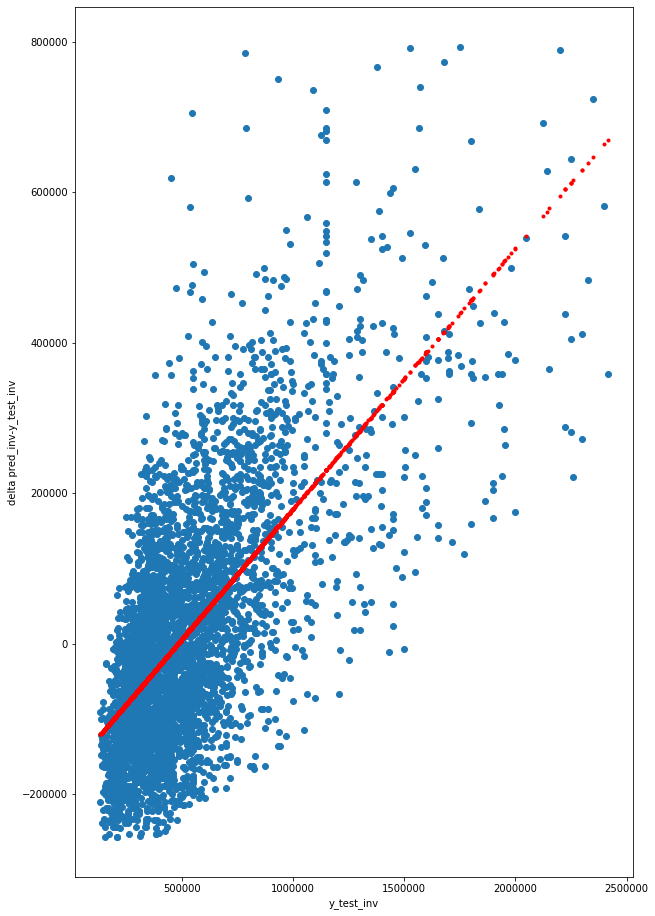

In [121]:
reg=linear_model.LinearRegression()
x_train=np.array(X_train['sqft_living']).reshape(-1,1)
y_train=np.array(y_train).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(X_valid['sqft_living']).reshape(-1,1)
y_test=np.array(y_valid).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')

evaluate(reg, x_train, y_train, x_test, y_test, pred, price_lambda)

### Jednoduchá lineárna regresia - grade

In [12]:
reg=linear_model.LinearRegression()
x_train=np.array(X_train['grade']).reshape(-1,1)
y_train=np.array(y_train).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(X_valid['grade']).reshape(-1,1)
y_test=np.array(y_valid).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')

evaluate(reg, x_train, y_train, x_test, y_test, pred, price_lambda)

linear model
Mean Squared Error 55001939903.94096
Root Mean Squared Error 234524.92384
Root Mean Squared Log Error 0.38054
R squared training 0.477
R squared testing 0.432
Adjusted-R squared training 0.477
Adjusted-R squared testing 0.432
intercept [3.93205218]
coefficient [[0.01344416]]


### Viacnásobná lineárna regresia

multiple linear regression 1
Mean Squared Error 34944367428.43664
Root Mean Squared Error 186934.12591
Root Mean Squared Log Error 0.25884
R squared training 0.781
R squared testing 0.744
Adjusted-R squared training 0.781
Adjusted-R squared testing 0.744
intercept [1.48311087]
coefficient [[ 1.51482623e-02  3.41215946e-03  3.78452993e-03  2.31928488e-03
   7.04038947e-03 -1.43355076e-04 -2.82001549e-03  5.83690344e-02
  -2.81136532e-02 -1.12521301e+01]]


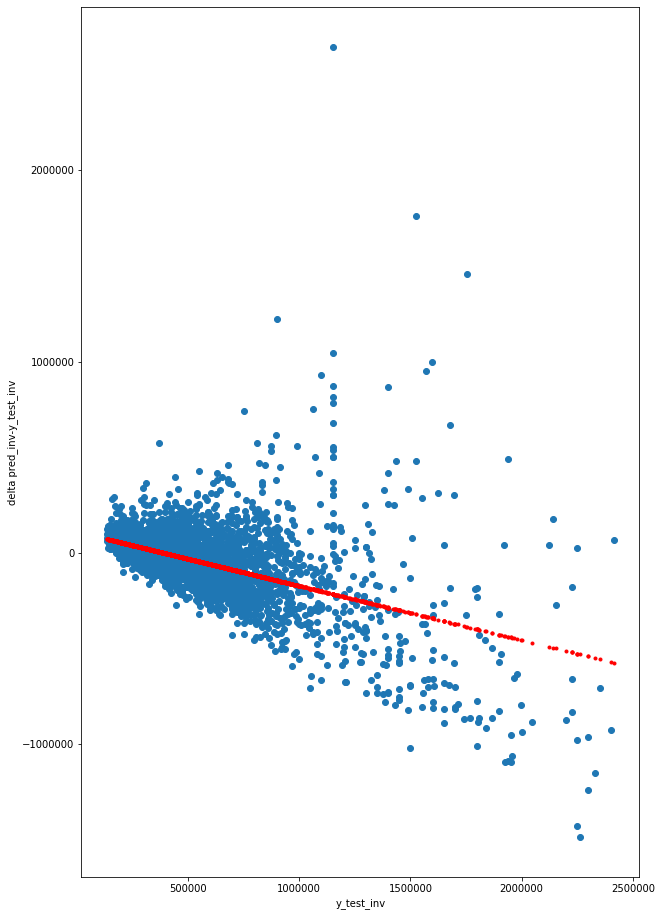

In [102]:
features1 = feature_selection2.select_features_SFS(X_train, y_train, linear_model.LinearRegression)
reg=linear_model.LinearRegression()
reg.fit(X_train[features1],y_train)

pred=reg.predict(X_valid[features1])

print('multiple linear regression 1')
evaluate(reg, X_train[features1], y_train, X_valid[features1], y_valid, pred, price_lambda)

### Viacnásobná lineárna regresia - part2

In [14]:
features2 = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','grade','sqft_above','sqft_basement','lat','sqft_living15']
reg=linear_model.LinearRegression()
reg.fit(X_train[features2],y_train)

pred=reg.predict(X_valid[features2])

print('complex_model 2')
evaluate(reg, X_train[features2], y_train, X_valid[features2], y_valid, pred, price_lambda)

complex_model 2
Mean Squared Error 36472708143.15429
Root Mean Squared Error 190978.29233
Root Mean Squared Log Error 0.27944
R squared training 0.736
R squared testing 0.704
Adjusted-R squared training 0.736
Adjusted-R squared testing 0.703
intercept [0.65803596]
coefficient [[-6.55531794e-04 -3.82822926e-04  1.29298561e-02 -2.17486094e-02
   1.12249895e-04  1.01926527e-02  3.34321895e-03  5.88036290e-03
   1.09690458e-02  8.46005158e-05  6.73535174e-02  9.86728393e-03]]


### Polynomiálna regresia 2. stupňa

In [15]:
features1 = feature_selection2.select_features_SFS(X_train, y_train, linear_model.LinearRegression)
# features1 = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
#        'waterfront', 'view', 'condition', 'grade', 'yr_built', 'zipcode_1',
#        'zipcode_2', 'zipcode_3', 'zipcode_4', 'zipcode_5', 'zipcode_6',
#        'zipcode_7', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
#        'price_per_sqft']

polyfeat=PolynomialFeatures(degree=2)
xtrain_poly=polyfeat.fit_transform(X_train[features1])
xvalid_poly=polyfeat.fit_transform(X_valid[features1])

np_y_train = np.array(y_train).reshape(-1,1)
np_y_valid = np.array(y_valid).reshape(-1,1)

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,np_y_train)
polypred=poly.predict(xvalid_poly)

print('Complex Model_3')

mean_squared_error=metrics.mean_squared_error(inv_boxcox(np_y_valid, price_lambda),inv_boxcox(polypred, price_lambda))
rmlse = metrics.mean_squared_log_error(inv_boxcox(np_y_valid, price_lambda),inv_boxcox(polypred, price_lambda))

r2_train = poly.score(xtrain_poly, np_y_train)
r2_test = poly.score(xvalid_poly, np_y_valid)
adj_r2_train = 1 - (((1 - r2_train) * (X_train[features1].shape[0] - 1)) / (X_train[features1].shape[0] - X_train[features1].shape[1] - 1))
adj_r2_test = 1 - (((1 - r2_test) * (X_valid[features1].shape[0] - 1)) / (X_valid[features1].shape[0] - X_valid[features1].shape[1] - 1))

print('Mean Squared Error', round(mean_squared_error, 5))
print('Root Mean Squared Error', round(np.sqrt(mean_squared_error),5))
print('Root Mean Squared Log Error', round(np.sqrt(rmlse),5))
print('R squared training',round(r2_train,3))
print('R squared testing',round(r2_test,3))
print('Adjusted-R squared training', round(adj_r2_train,3))
print('Adjusted-R squared testing', round(adj_r2_test,3))

Complex Model_3
Mean Squared Error 25599854129.10427
Root Mean Squared Error 159999.54415
Root Mean Squared Log Error 0.23187
R squared training 0.828
R squared testing 0.789
Adjusted-R squared training 0.828
Adjusted-R squared testing 0.789


### Polynomiálna regresia 3. stupňa

In [16]:
features1 = feature_selection2.select_features_RFE(X_train, X_valid, y_train, y_valid)

polyfeat=PolynomialFeatures(degree=3)
xtrain_poly=polyfeat.fit_transform(X_train[features1])
xvalid_poly=polyfeat.fit_transform(X_valid[features1])
np_y_train = np.array(y_train).reshape(-1,1)
np_y_valid = np.array(y_valid).reshape(-1,1)

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,np_y_train)
polypred=poly.predict(xvalid_poly)

print('Complex Model_4')
mean_squared_error=metrics.mean_squared_error(inv_boxcox(np_y_valid, price_lambda),inv_boxcox(polypred, price_lambda))
rmlse = metrics.mean_squared_log_error(inv_boxcox(np_y_valid, price_lambda),inv_boxcox(polypred, price_lambda))

r2_train = poly.score(xtrain_poly, np_y_train)
r2_test = poly.score(xvalid_poly, np_y_valid)
adj_r2_train = 1 - (((1 - r2_train) * (X_train[features1].shape[0] - 1)) / (X_train[features1].shape[0] - X_train[features1].shape[1] - 1))
adj_r2_test = 1 - (((1 - r2_test) * (X_valid[features1].shape[0] - 1)) / (X_valid[features1].shape[0] - X_valid[features1].shape[1] - 1))

print('Mean Squared Error', round(mean_squared_error, 5))
print('Root Mean Squared Error', round(np.sqrt(mean_squared_error),5))
print('Root Mean Squared Log Error', round(np.sqrt(rmlse),5))
print('R squared training',round(r2_train,3))
print('R squared testing',round(r2_test,3))
print('Adjusted-R squared training', round(adj_r2_train,3))
print('Adjusted-R squared testing', round(adj_r2_test,3))

Optimum number of features: 22 (all features: 27)
Score with 22 features: 0.754436
Complex Model_4
Mean Squared Error 236372347755.9625
Root Mean Squared Error 486181.39388
Root Mean Squared Log Error 0.21942
R squared training 0.916
R squared testing 0.828
Adjusted-R squared training 0.916
Adjusted-R squared testing 0.827


In [17]:
np.any(np.isnan(inv_boxcox(polypred, price_lambda)))
# np.all(np.isfinite(inv_boxcox(polypred, price_lambda)))

False

In [18]:
features1

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_built',
 'zipcode_1',
 'zipcode_2',
 'zipcode_3',
 'zipcode_4',
 'zipcode_5',
 'zipcode_6',
 'zipcode_7',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'price_per_sqft']

In [19]:
trying = inv_boxcox(polypred, price_lambda)
[index for index,value in enumerate(trying) if not np.isfinite(value)]

[]

In [20]:
trying[871]

array([874676.5123932])

In [21]:
polypred[868:873], price_lambda

(array([[3.99812716],
        [4.01429815],
        [4.01440258],
        [4.0638431 ],
        [4.06526911]]), -0.2363775890937908)

### Regresný rozhodovací strom

In [22]:
# features3 = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','grade','sqft_above','sqft_basement','lat','long','sqft_living15', 'recon_age']
features3 = list(X_train.columns)
regr_1 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train[features3], y_train)

y_1 = regr_1.predict(X_valid[features3])
mean_squared_error=metrics.mean_squared_error(inv_boxcox(y_valid, price_lambda),inv_boxcox(y_1, price_lambda))
rmlse = metrics.mean_squared_log_error(inv_boxcox(y_valid, price_lambda), inv_boxcox(y_1, price_lambda))

r2_train = regr_1.score(X_train[features3], y_train)
r2_test = regr_1.score(X_valid[features3], y_valid)
adj_r2_train = 1 - (((1 - r2_train) * (X_train[features3].shape[0] - 1)) / (X_train[features3].shape[0] - X_train[features3].shape[1] - 1))
adj_r2_test = 1 - (((1 - r2_test) * (X_valid[features3].shape[0] - 1)) / (X_valid[features3].shape[0] - X_valid[features3].shape[1] - 1))

print('Mean Squared Error', round(mean_squared_error, 2))
print('Root Mean Squared Error', round(np.sqrt(mean_squared_error),2))
print('Root Mean Squared Log Error', round(np.sqrt(rmlse),2))
print('R squared training',round(r2_train,3))
print('R squared testing',round(r2_test,3))
print('Adjusted-R squared training', round(adj_r2_train,3))
print('Adjusted-R squared testing', round(adj_r2_test,3))

Mean Squared Error 23570547422.74
Root Mean Squared Error 153527.03
Root Mean Squared Log Error 0.23
R squared training 0.861
R squared testing 0.802
Adjusted-R squared training 0.861
Adjusted-R squared testing 0.8


## Vyhodnocovanie

Metriky:
- Mean Square Error (MSE)
- Root Mean Square Error (RMSE)
- Root Mean Squared Log Error (RMSLE)
- R-squared
- Adjusted R-squared